In [ ]:
from google.colab import files
uploaded = files.upload()

Saving VNM.csv to VNM.csv


In [ ]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [1]:
df = pd.read_csv("VNM.csv")
df

NameError: name 'pd' is not defined

In [ ]:
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df['Date'] = pd.to_datetime(df['Date'])
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-01,110654.0,"112,611.00","112,611.00","110,654.00",1.04M,0.21%
1,2019-03-04,111828.0,"110,732.00","112,611.00","110,732.00",1.05M,1.06%
2,2019-03-05,111124.0,"111,515.00","111,750.00","110,811.00",639.01K,-0.63%
3,2019-03-06,110341.0,"111,124.00","111,750.00","108,385.00",853.50K,-0.70%
4,2019-03-07,109324.0,"110,576.00","111,124.00","109,167.00",849.60K,-0.92%
...,...,...,...,...,...,...,...
1310,2024-05-29,66300.0,"67,000.00","67,300.00","66,000.00",3.36M,-0.75%
1311,2024-05-30,65700.0,"66,100.00","66,200.00","65,500.00",4.41M,-0.90%
1312,2024-05-31,65400.0,"65,900.00","65,900.00","65,300.00",4.14M,-0.46%
1313,2024-06-03,66100.0,"65,800.00","66,600.00","65,700.00",3.19M,1.07%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1315 non-null   datetime64[ns]
 1   Price     1315 non-null   float64       
 2   Open      1315 non-null   object        
 3   High      1315 non-null   object        
 4   Low       1315 non-null   object        
 5   Vol.      1315 non-null   object        
 6   Change %  1315 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 72.0+ KB


<h1>Split the data into training, testing, and validation arcording to 7:2:1

In [ ]:
# Split the data into training, testing, and validation arcording to 7:2:1
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.1 MB/s eta 0:00:00


In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15869.283, Time=3.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15866.335, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15868.306, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15868.302, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15865.168, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15870.320, Time=1.26 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.940 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
#last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1
 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1
 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1
 73162.1 73162.1 73162.1]


In [ ]:
# Predict the closing prices for the next 60 days
x_next_60_days = model.fit(y_next_30_days)
y_next_60_days = model.predict(n_periods=30)

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Predict the closing prices for the next 60 days
x_next_90_days = model.fit(y_next_60_days)
y_next_90_days =  model.predict(n_periods=30)

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 60 days:
[73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1
 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1
 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1
 73162.1 73162.1 73162.1]
Predicted closing prices for the next 90 days:
[73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1
 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1
 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1
 73162.1 73162.1 73162.1]


In [ ]:
# 7. Tính RMSE, MSE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 6129.779148290601
Testing RMSE: 4567.683427701995
Validation MAE: 5900.496969696974
Testing MAE: 3523.2216730038053
Validation MAPE: 8.83774313364565
Testing MAPE: 5.152018765187877


In [ ]:
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

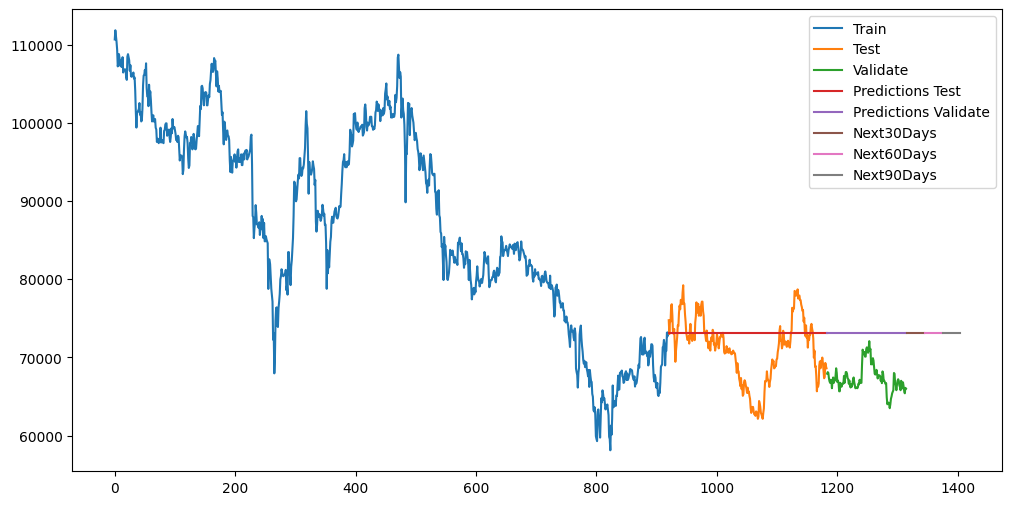

In [ ]:
# 8.Vẽ hình
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(index_30_days, y_next_30_days)
plt.plot(index_60_days, y_next_60_days)
plt.plot(index_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Validate', 'Predictions Test', 'Predictions Validate','Next30Days','Next60Days','Next90Days'])
plt.show()

<h1># Split the data into training, testing, and validation arcording to 6:3:1

In [ ]:
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13629.622, Time=2.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13625.779, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13627.695, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13627.692, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13625.108, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13629.733, Time=0.29 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.780 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
#last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5
 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5
 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5
 66224.5 66224.5 66224.5]


In [ ]:
# Predict the closing prices for the next 60 days
x_next_60_days = model.fit(y_next_30_days)
y_next_60_days = model.predict(n_periods=30)

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Predict the closing prices for the next 60 days
x_next_90_days = model.fit(y_next_60_days)
y_next_90_days =  model.predict(n_periods=30)

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 60 days:
[66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5
 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5
 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5
 66224.5 66224.5 66224.5]
Predicted closing prices for the next 90 days:
[66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5
 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5
 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5 66224.5
 66224.5 66224.5 66224.5]


In [ ]:
# 7. Tính RMSE, MSE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 1958.03743909017
Testing RMSE: 5553.857174815422
Validation MAE: 1405.2439393939403
Testing MAE: 4602.560659898477
Validation MAPE: 2.0527767756613535
Testing MAPE: 6.422385870346716


In [ ]:
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

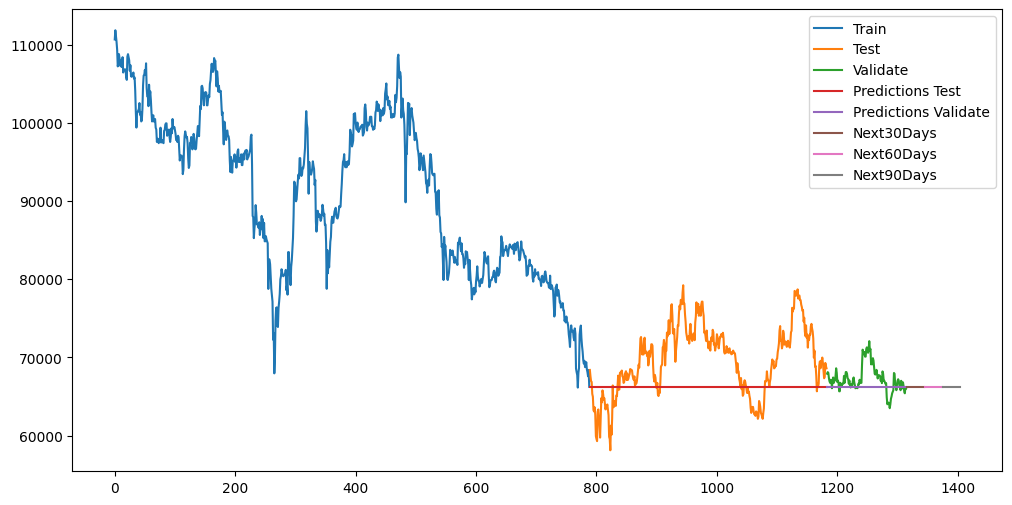

In [ ]:
# 8.Vẽ hình
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(index_30_days, y_next_30_days)
plt.plot(index_60_days, y_next_60_days)
plt.plot(index_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Validate', 'Predictions Test', 'Predictions Validate','Next30Days','Next60Days','Next90Days'])
plt.show()

<h1># Split the data into training, testing, and validation arcording to 5:3:2

In [ ]:
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11410.458, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11406.317, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11408.255, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11408.253, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11404.823, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11410.281, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.629 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
#last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3
 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3
 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3
 84448.3 84448.3 84448.3]


In [ ]:
# Predict the closing prices for the next 60 days
x_next_60_days = model.fit(y_next_30_days)
y_next_60_days = model.predict(n_periods=30)

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Predict the closing prices for the next 60 days
x_next_90_days = model.fit(y_next_60_days)
y_next_90_days =  model.predict(n_periods=30)

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 60 days:
[84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3
 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3
 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3
 84448.3 84448.3 84448.3]
Predicted closing prices for the next 90 days:
[84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3
 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3
 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3 84448.3
 84448.3 84448.3 84448.3]


In [ ]:
# 7. Tính RMSE, MSE, MAPE

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 16300.198224491853
Testing RMSE: 13491.37295734435
Validation MAE: 15880.654545454548
Testing MAE: 12129.79949238579
Validation MAPE: 23.50218571793654
Testing MAPE: 17.551291204062363


In [ ]:
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

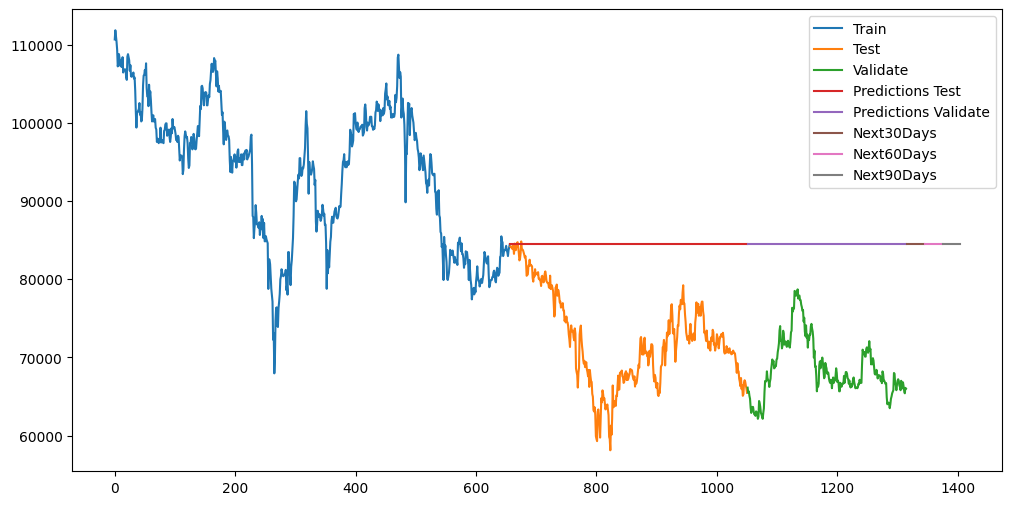

In [ ]:
# 8.Vẽ hình
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(index_30_days, y_next_30_days)
plt.plot(index_60_days, y_next_60_days)
plt.plot(index_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Validate', 'Predictions Test', 'Predictions Validate','Next30Days','Next60Days','Next90Days'])
plt.show()